In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_validate
from sklearn import metrics

from collections import Counter
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, BaggingRegressor, VotingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GroupKFold, GroupShuffleSplit
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR, LinearSVR

In [3]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
import os
path = "/content/drive/MyDrive/sensor_dataset" # /content is pretty much the root. you can choose other path in your colab workspace
os.chdir(path)

In [5]:
!ls /content/drive/MyDrive/sensor_dataset

sensor01_air.txt	  sensor04_izopropanol.txt  sensor07_water.txt
sensor01_izopropanol.txt  sensor04_water.txt	    sensor08_air.txt
sensor01_water.txt	  sensor05_air.txt	    sensor08_izopropanol.txt
sensor02_air.txt	  sensor05_izopropanol.txt  sensor08_water.txt
sensor02_izopropanol.txt  sensor05_water.txt	    sensor09_air.txt
sensor02_water.txt	  sensor06_air.txt	    sensor09_izopropanol.txt
sensor03_air.txt	  sensor06_izopropanol.txt  sensor09_water.txt
sensor03_izopropanol.txt  sensor06_water.txt	    sensor10_air.txt
sensor03_water.txt	  sensor07_air.txt	    sensor10_izopropanol.txt
sensor04_air.txt	  sensor07_izopropanol.txt  sensor10_water.txt


In [6]:
#Read the all files

In [7]:
sensor01_air=pd.read_csv('sensor01_air.txt', sep=',', header=None, names=['Column1', 'Column2'])
sensor01_izo=pd.read_csv('sensor01_izopropanol.txt', sep=',', header=None, names=['Column3', 'Column4'])
sensor01_water=pd.read_csv('sensor01_water.txt', sep=',', header=None, names=['Column5', 'Column6'])
sensor02_air=pd.read_csv('sensor02_air.txt', sep=',', header=None, names=['Column1', 'Column2'])
sensor02_izo=pd.read_csv('sensor02_izopropanol.txt', sep=',', header=None, names=['Column3', 'Column4'])
sensor02_water=pd.read_csv('sensor02_water.txt', sep=',', header=None, names=['Column5', 'Column6'])
sensor03_air=pd.read_csv('sensor03_air.txt', sep=',', header=None, names=['Column1', 'Column2'])
sensor03_izo=pd.read_csv('sensor03_izopropanol.txt', sep=',', header=None, names=['Column3', 'Column4'])
sensor03_water=pd.read_csv('sensor03_water.txt', sep=',', header=None, names=['Column5', 'Column6'])
sensor04_air=pd.read_csv('sensor04_air.txt', sep=',', header=None, names=['Column1', 'Column2'])
sensor04_izo=pd.read_csv('sensor04_izopropanol.txt', sep=',', header=None, names=['Column3', 'Column4'])
sensor04_water=pd.read_csv('sensor04_water.txt', sep=',', header=None, names=['Column5', 'Column6'])
sensor05_air=pd.read_csv('sensor05_air.txt', sep=',', header=None, names=['Column1', 'Column2'])
sensor05_izo=pd.read_csv('sensor05_izopropanol.txt', sep=',', header=None, names=['Column3', 'Column4'])
sensor05_water=pd.read_csv('sensor05_water.txt', sep=',', header=None, names=['Column5', 'Column6'])
sensor06_air=pd.read_csv('sensor06_air.txt', sep=',', header=None, names=['Column1', 'Column2'])
sensor06_izo=pd.read_csv('sensor06_izopropanol.txt', sep=',', header=None, names=['Column3', 'Column4'])
sensor06_water=pd.read_csv('sensor06_water.txt', sep=',', header=None, names=['Column5', 'Column6'])
sensor07_air=pd.read_csv('sensor07_air.txt', sep=',', header=None, names=['Column1', 'Column2'])
sensor07_izo=pd.read_csv('sensor07_izopropanol.txt', sep=',', header=None, names=['Column3', 'Column4'])
sensor07_water=pd.read_csv('sensor07_water.txt', sep=',', header=None, names=['Column5', 'Column6'])
sensor08_air=pd.read_csv('sensor08_air.txt', sep=',', header=None, names=['Column1', 'Column2'])
sensor08_izo=pd.read_csv('sensor08_izopropanol.txt', sep=',', header=None, names=['Column3', 'Column4'])
sensor08_water=pd.read_csv('sensor08_water.txt', sep=',', header=None, names=['Column5', 'Column6'])
sensor09_air=pd.read_csv('sensor09_air.txt', sep=',', header=None, names=['Column1', 'Column2'])
sensor09_izo=pd.read_csv('sensor09_izopropanol.txt', sep=',', header=None, names=['Column3', 'Column4'])
sensor09_water=pd.read_csv('sensor09_water.txt', sep=',', header=None, names=['Column5', 'Column6'])
sensor10_air=pd.read_csv('sensor10_air.txt', sep=',', header=None, names=['Column1', 'Column2'])
sensor10_izo=pd.read_csv('sensor10_izopropanol.txt', sep=',', header=None, names=['Column3', 'Column4'])
sensor10_water=pd.read_csv('sensor10_water.txt', sep=',', header=None, names=['Column5', 'Column6'])

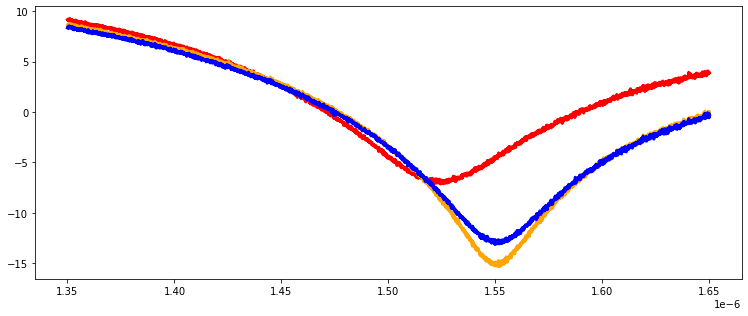

In [8]:
#Plot contains one sensor in air, water and iso
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
plt.subplot(111)
plt.plot(sensor01_air.Column1, sensor01_air.Column2, color='red', lw=3)
plt.plot(sensor01_izo.Column3, sensor01_izo.Column4, color='orange', lw=3)
plt.plot(sensor01_water.Column5, sensor01_water.Column6, color='blue', lw=3)

In [9]:
#Join and merge all files to one

In [10]:
all_air = pd.concat([sensor01_air, sensor02_air, sensor03_air, sensor04_air, sensor05_air, sensor06_air, sensor07_air, sensor08_air, sensor09_air, sensor10_air], axis=0, ignore_index=True)

In [11]:
all_air

,Column1,Column2
0,0.000001,9.1792
1,0.000001,9.2003
2,0.000001,9.1968
3,0.000001,9.1028
4,0.000001,9.0601
...,...,...
30005,0.000002,3.2784
30006,0.000002,3.4213
30007,0.000002,3.3112
30008,0.000002,3.4500


In [12]:
all_izo = pd.concat([sensor01_izo, sensor02_izo, sensor03_izo, sensor04_izo, sensor05_izo, sensor06_izo, sensor07_izo, sensor08_izo, sensor09_izo, sensor10_izo], axis=0, ignore_index=True)

In [13]:
all_izo

,Column3,Column4
0,0.000001,8.55510
1,0.000001,8.67500
2,0.000001,8.71160
3,0.000001,8.71570
4,0.000001,8.67920
...,...,...
30005,0.000002,-0.61478
30006,0.000002,-0.53629
30007,0.000002,-0.81838
30008,0.000002,-0.57202


In [14]:
all_water = pd.concat([sensor01_water, sensor02_water, sensor03_water, sensor04_water, sensor05_water, sensor06_water, sensor07_water, sensor08_water, sensor09_water, sensor10_water], axis=0, ignore_index=True)

In [15]:
all_water

,Column5,Column6
0,0.000001,8.35700
1,0.000001,8.42870
2,0.000001,8.44220
3,0.000001,8.41440
4,0.000001,8.40340
...,...,...
30005,0.000002,-0.86565
30006,0.000002,-0.84435
30007,0.000002,-0.97383
30008,0.000002,-0.63849


In [16]:
data = all_air.join(all_izo, on=None, how='left')

In [17]:
data = data.join(all_water, on=None, how='left')

In [18]:
data

,Column1,Column2,Column3,Column4,Column5,Column6
0,0.000001,9.1792,0.000001,8.55510,0.000001,8.35700
1,0.000001,9.2003,0.000001,8.67500,0.000001,8.42870
2,0.000001,9.1968,0.000001,8.71160,0.000001,8.44220
3,0.000001,9.1028,0.000001,8.71570,0.000001,8.41440
4,0.000001,9.0601,0.000001,8.67920,0.000001,8.40340
...,...,...,...,...,...,...
30005,0.000002,3.2784,0.000002,-0.61478,0.000002,-0.86565
30006,0.000002,3.4213,0.000002,-0.53629,0.000002,-0.84435
30007,0.000002,3.3112,0.000002,-0.81838,0.000002,-0.97383
30008,0.000002,3.4500,0.000002,-0.57202,0.000002,-0.63849


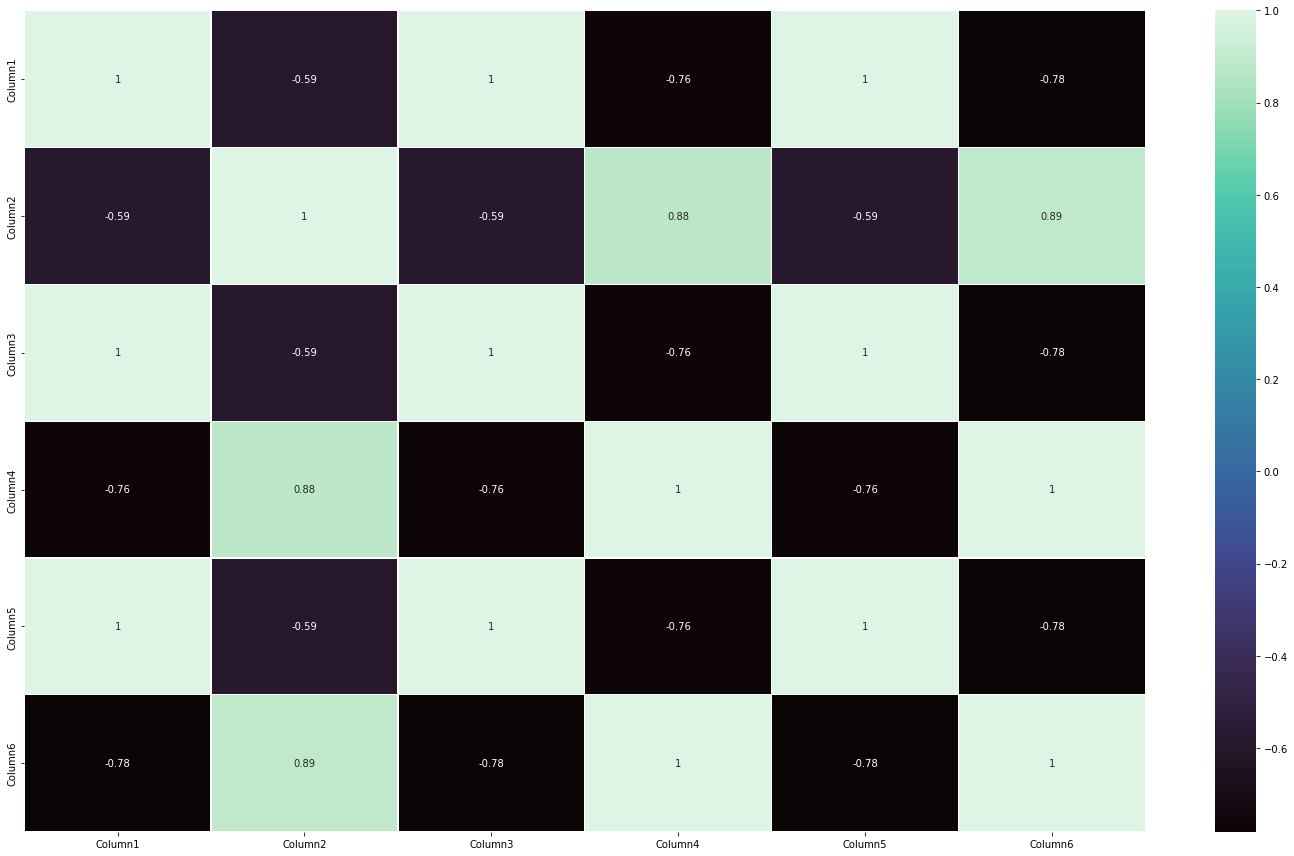

In [19]:
#Correlation between columns
sns.heatmap(data.corr(),annot=True,cmap='mako',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [20]:
#Columns 1, 3 and 5 have the same values so I delete two of them

In [21]:
data = data.drop(['Column3', 'Column5'], axis=1)

In [22]:
#Make variable dependency indicators

In [23]:
data["score_air_izo"] = data["Column2"] / data["Column4"]

In [24]:
data["score_air_wat"] = data["Column2"] / data["Column6"]

In [25]:
data

,Column1,Column2,Column4,Column6,score_air_izo,score_air_wat
0,0.000001,9.1792,8.55510,8.35700,1.072951,1.098385
1,0.000001,9.2003,8.67500,8.42870,1.060553,1.091544
2,0.000001,9.1968,8.71160,8.44220,1.055696,1.089384
3,0.000001,9.1028,8.71570,8.41440,1.044414,1.081812
4,0.000001,9.0601,8.67920,8.40340,1.043887,1.078147
...,...,...,...,...,...,...
30005,0.000002,3.2784,-0.61478,-0.86565,-5.332639,-3.787212
30006,0.000002,3.4213,-0.53629,-0.84435,-6.379571,-4.051993
30007,0.000002,3.3112,-0.81838,-0.97383,-4.046042,-3.400183
30008,0.000002,3.4500,-0.57202,-0.63849,-6.031258,-5.403374


In [26]:
#Work on two datasets - one for predicting the amplitude in the air, the other for iso

In [27]:
data1 = data.drop(['Column4'], axis=1)

In [28]:
data1

,Column1,Column2,Column6,score_air_izo,score_air_wat
0,0.000001,9.1792,8.35700,1.072951,1.098385
1,0.000001,9.2003,8.42870,1.060553,1.091544
2,0.000001,9.1968,8.44220,1.055696,1.089384
3,0.000001,9.1028,8.41440,1.044414,1.081812
4,0.000001,9.0601,8.40340,1.043887,1.078147
...,...,...,...,...,...
30005,0.000002,3.2784,-0.86565,-5.332639,-3.787212
30006,0.000002,3.4213,-0.84435,-6.379571,-4.051993
30007,0.000002,3.3112,-0.97383,-4.046042,-3.400183
30008,0.000002,3.4500,-0.63849,-6.031258,-5.403374


In [29]:
data2 = data.drop(['Column6'], axis=1)

In [30]:
#Predicing column4 amplitude for sensor in isopropanol

In [31]:
x = data2.drop('Column4', axis=1)
y = data2.Column4

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 12)

In [32]:
#Building regression models

In [33]:
#Linear Regression

In [34]:
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train)

LinearRegression()

In [35]:
# print the intercept
print(regressor_linear.intercept_)

41.80847697183959


In [36]:
coeff_df = pd.DataFrame(regressor_linear.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Column1,-2.955804e+07
Column2,9.441334e-01
score_air_izo,8.464303e-04
score_air_wat,1.647386e-03


In [37]:
#Functions for metrics

In [38]:
def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()
    
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [39]:
pred = regressor_linear.predict(x_test)

In [40]:
test_pred = regressor_linear.predict(x_test)
train_pred = regressor_linear.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 2.04671352374128
MSE: 6.569168111557095
RMSE: 2.5630388431619786
R2 Square 0.8633508940811108
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.040412572211622
MSE: 6.577391284228983
RMSE: 2.5646425256220375
R2 Square 0.8651014757888855
__________________________________


In [41]:
#Ridge

In [42]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.7310203728885645
MSE: 10.766126720548689
RMSE: 3.281177642333418
R2 Square 0.7760475047085182
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.722068882842799
MSE: 10.764922924570655
RMSE: 3.280994197582595
R2 Square 0.7792176026910641
__________________________________


In [43]:
print(model.intercept_)

-2.7892427172216037


In [44]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Column1,-0.000034
Column2,1.254117
score_air_izo,0.006341
score_air_wat,0.025989


In [45]:
#Polynomail Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(x_train)
X_test_2_d = poly_reg.transform(x_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.6136173719953388
MSE: 0.9961778824080987
RMSE: 0.9980871116330973
R2 Square 0.9792779215487343
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.616249774228882
MSE: 0.9284275240196809
RMSE: 0.9635494403608363
R2 Square 0.9809584837794981
__________________________________


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [47]:
#Lasso Regression

In [48]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.735471258070514
MSE: 10.771319750682443
RMSE: 3.281968883259322
R2 Square 0.775939481453102
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.726451187353302
MSE: 10.765519221064444
RMSE: 3.2810850676360777
R2 Square 0.7792053729918522
__________________________________


In [49]:
#Elastic Net Regression

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.7354631849596993
MSE: 10.77076554802591
RMSE: 3.2818844507425777
R2 Square 0.7759510097465216
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.7264498178355243
MSE: 10.765506002399382
RMSE: 3.2810830532614355
R2 Square 0.779205644099094
__________________________________


In [50]:
#SVM Regressor

from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf')
svm_reg.fit(x_train, y_train)

test_pred = svm_reg.predict(x_test)
train_pred = svm_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1.0247639160695854
MSE: 4.701570659407976
RMSE: 2.168310554189131
R2 Square 0.9021998803939425
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0024604800184507
MSE: 4.0267734046190435
RMSE: 2.006682188244826
R2 Square 0.9174131861490206
__________________________________


In [51]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,2.046714,6.569168,2.563039,0.863351,0.863663
1,Ridge Regression,2.731020,10.766127,3.281178,0.776048,0.646372
2,Polynomail Regression,0.613617,0.996178,0.998087,0.979278,0.000000
3,Lasso Regression,2.735471,10.771320,3.281969,0.775939,0.757002
4,Elastic Net Regression,2.735463,10.770766,3.281884,0.775951,0.725316
5,SVM Regressor,1.024764,4.701571,2.168311,0.902200,0.000000


In [52]:
#Predicing column6 amplitude for sensor in water

In [53]:
x = data1.drop('Column6', axis=1)
y = data1.Column6

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 12)

In [54]:
#Linear Regression

In [55]:
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train)

LinearRegression()

In [56]:
# print the intercept
print(regressor_linear.intercept_)

42.10540703466811


In [57]:
coeff_df = pd.DataFrame(regressor_linear.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Column1,-2.968727e+07
Column2,8.786241e-01
score_air_izo,6.625102e-04
score_air_wat,8.377677e-04


In [58]:
pred = regressor_linear.predict(x_test)

In [59]:
test_pred = regressor_linear.predict(x_test)
train_pred = regressor_linear.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1.7580767598349294
MSE: 4.743169285587434
RMSE: 2.177881834624513
R2 Square 0.8887256997166656
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.7498904602156224
MSE: 4.70844786338101
RMSE: 2.1698958185546626
R2 Square 0.8908610808456366
__________________________________


In [60]:
#Ridge

from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.5604596473945054
MSE: 8.982286239788506
RMSE: 2.9970462525273955
R2 Square 0.7892764191836551
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.545378445566579
MSE: 8.93267815456807
RMSE: 2.9887586310319656
R2 Square 0.7929460265397735
__________________________________


In [61]:
#Polynomail Regression

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(x_train)
X_test_2_d = poly_reg.transform(x_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.4936699374732754
MSE: 0.6134925156782665
RMSE: 0.7832576304628424
R2 Square 0.985607523935822
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.49371847728933094
MSE: 0.5559073581274637
RMSE: 0.7455919514905346
R2 Square 0.9871144101036254
__________________________________


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [62]:
#Lasso Regression

from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.566750879855618
MSE: 8.987568908997076
RMSE: 2.997927435578966
R2 Square 0.7891524882664942
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.5518171705196506
MSE: 8.933274563398504
RMSE: 2.988858404708812
R2 Square 0.7929322021507144
__________________________________


In [63]:
#Elastic Net Regression

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2.566740301042473
MSE: 8.98702997111194
RMSE: 2.997837549153046
R2 Square 0.7891651316980173
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.5518232636009874
MSE: 8.93325590014991
RMSE: 2.9888552825705546
R2 Square 0.7929326347533127
__________________________________


In [64]:
#SVM Regressor

from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf')
svm_reg.fit(x_train, y_train)

test_pred = svm_reg.predict(x_test)
train_pred = svm_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.8689845089538558
MSE: 3.932669507877757
RMSE: 1.983095940159668
R2 Square 0.9077399474093395
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8459334765870518
MSE: 3.2950805795336238
RMSE: 1.8152356815393487
R2 Square 0.9236220632761561
__________________________________


In [65]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.758077,4.743169,2.177882,0.888726,0.889047
1,Ridge Regression,2.560460,8.982286,2.997046,0.789276,0.644383
2,Polynomail Regression,0.493670,0.613493,0.783258,0.985608,0.000000
3,Lasso Regression,2.566751,8.987569,2.997927,0.789152,0.769125
4,Elastic Net Regression,2.566740,8.987030,2.997838,0.789165,0.733529
5,SVM Regressor,0.868985,3.932670,1.983096,0.907740,0.000000
